In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Loading MNIST dataset

In [2]:
mist = tf.keras.datasets.mnist

## after loading MNIST dataset DIVIDE into train and test datasets

In [6]:
(x_train, y_train) ,(x_test, y_test) = mist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

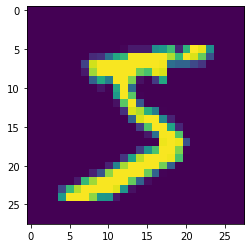

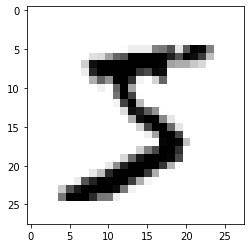

In [10]:
# check on graph how the data looks like

plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap = plt.cm.binary)

In [ ]:
## checking value of each pixel 
# Before normalization

In [11]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

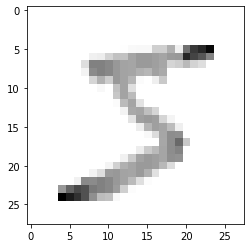

In [12]:
## Normalizing data

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

## after Normalization 

In [13]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
# checking that we have labels in our target
print(y_train[0])

5


## Resizing the image to make it suitable to apply convulational network

In [16]:
IMG_SIZE = 28

x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print(x_trainr.shape)

(60000, 28, 28, 1)


## Creating a Deep Neural Network

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

In [22]:
# creating model
model = Sequential()

#first convolution layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#second convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Third convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

# Last connected layer (the output layer)
model.add(Dense(10))
model.add(Activation('softmax'))

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)         

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam' , metrics  = ['accuracy'])

In [28]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 63s 48ms/step - loss: 0.3097 - accuracy: 0.9026 - val_loss: 0.1313 - val_accuracy: 0.9611
Epoch 2/5
1313/1313 [==============================] - 85s 64ms/step - loss: 0.1012 - accuracy: 0.9691 - val_loss: 0.1188 - val_accuracy: 0.9627
Epoch 3/5
1313/1313 [==============================] - 66s 50ms/step - loss: 0.0730 - accuracy: 0.9769 - val_loss: 0.0758 - val_accuracy: 0.9772
Epoch 4/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.0807 - val_accuracy: 0.9753
Epoch 5/5
1313/1313 [==============================] - 70s 53ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0594 - val_accuracy: 0.9819


In [29]:
# checking our model predictions

predictions  = model.predict(x_testr)

In [30]:
print(np.argmax(predictions[0]))

7


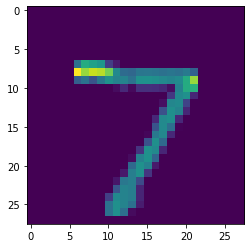

In [31]:
plt.imshow(x_testr[0])

In [32]:
print(np.argmax(predictions[1002]))

2


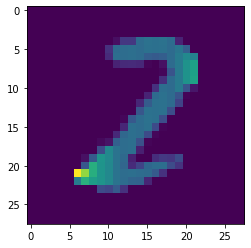

In [33]:
plt.imshow(x_testr[1002])